# This notebook generates figure 06, which shows a raw data comparison between 150 keV and 2400 keV data taken immediately one after the other proving that suppression does not require damage.

In [7]:
%pylab notebook
from scipy.optimize import curve_fit
import sys, os, importlib, warnings, pandas as pd, seaborn as sns
warnings.filterwarnings("ignore")
sys.path.append('/Users/alexisdevitre/Documents/code/hts-irradiation')
import hts_fitting as hts, hts_fitfunctions as ff, hts_misc as misc, default_figure_style as dfs
for lib in [hts, dfs, ff, misc]:
    importlib.reload(lib)


########## Load data ############
#################################
masterfile = '../data/data-master-linear.xlsx'
cols = [0, 12, 13, 14, 41, 55, 56, 59]
names = ['tapeid', 'energy', 'power', 'powerError', 'tTAR_OFF', 'suppression', 'suppressionError', 'outlier']
df = pd.read_excel(masterfile, sheet_name='data', usecols=cols, names=names, skiprows=1)


########## Filter data ##########
#################################
cut = df.tTAR_OFF <= 20
cut &= (df.suppression != np.nan) & (df.suppression > 0) & (df.suppressionError > 0)
cut &= df.outlier != 1
data = df[cut]


########## Describe data ##########
###################################
print('\n\nTotal datapoints', data.energy.count())
for tapeid in data.tapeid.unique():
    print('\nDatapoints for', tapeid, data[data.tapeid==tapeid].energy.count())

df.columns
outputDirectory = '../figures/raw/'

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Total datapoints 657

Datapoints for f33 68

Datapoints for f20 12

Datapoints for f34 9

Datapoints for f29 302

Datapoints for f23 2

Datapoints for f28 58

Datapoints for f37 206


## Figure description

This figure compares raw beam on data with two different energies for sample ffj37. The data were acquired sequentially, without intermediate anneals. The open circles are 150 keV proton beams, which do not damage the tape but deposit deat in the top silver layer. The yellow triangles are 2400 keV proton beams, which damage and heat the tape. This figure demonstrates that direct interactions between REBCO and the beam are not necessary to produce the "beam on effect".

<IPython.core.display.Javascript object>


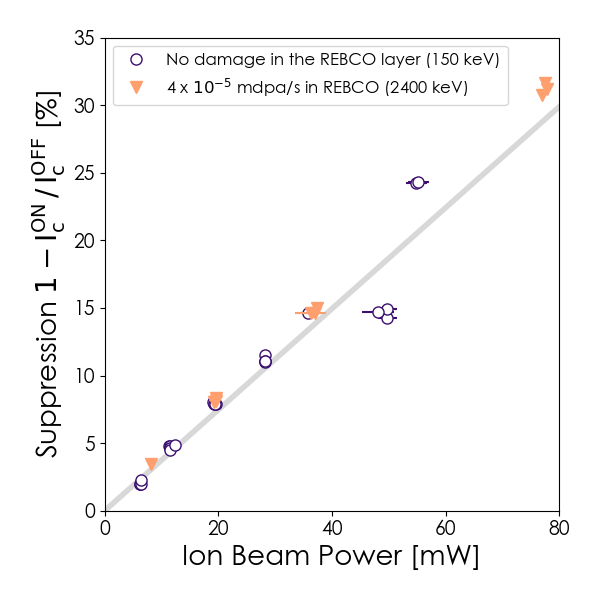

In [8]:
fig, ax = plt.subplots()
x, ex = data.power, data.powerError
y, ey = data.suppression, data.suppressionError

percent = 100 # switch suppression values to percentages

cut = (data.tapeid == 'f37') & ((data.energy == 150) | (data.energy == 2400)) & (data.power < 100)
popt, pcov = curve_fit(ff.affine, x[cut], y[cut]) 

ax.plot(np.linspace(0, 100, 10000), percent*ff.affine(np.linspace(0, 100, 10000), *popt), linewidth=4, linestyle='-', alpha=.3, color='gray')

labels = ['No damage in the REBCO layer (150 keV)', '4 x $\mathrm{10^{-5}}$ mdpa/s in REBCO (2400 keV)']
for energy, mfc, m, l in zip([150, 2400], ['white', None], ['o', 'v'], labels):
    c, cut = dfs.colors_energies[str(energy)], (df.tapeid == tapeid) & (df.energy == energy)
    ax.errorbar(x[cut], percent*y[cut], xerr=ex[cut], yerr=ey[cut], linestyle='None', color=c)
    ax.plot(x[cut], percent*y[cut], marker=m, markersize=8, linestyle='None', mfc=mfc, color=c, label=l)
    
ax.set_ylim(0, percent*0.35)
ax.set_xlim(0, 80)
ax.set_xlabel('Ion Beam Power [mW]')
if percent > 1:
    ax.set_ylabel('Suppression $\mathrm{1 - I_c^{ON}\, /\, I_c^{OFF}}$ [%]')
else:
    ax.set_ylabel('Suppression $\mathrm{1 - I_c^{ON}\, /\, I_c^{OFF}}$')
fig.tight_layout()
handles, labels = plt.gca().get_legend_handles_labels()
ax.legend(handles, labels, loc='upper left')

plt.savefig(dfs.outputDirectory+'figure06-150v2400keV.svg')